In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.stattools import coint
from itertools import combinations

# Atsisiunciame duomenis ( pvz . NVDA ir BTC )
tickers = ["BTC-USD", 'DX-Y.NYB', 'GC=F', 'BZ=F']
df = yf.download(tickers, start="2014-01-01")

# Suvienodinti dazni, nes portfeli sudaro kripto ir derivatyvai
df = df.dropna()

# Apskaiciuojame grazas
returns = df["Close"].pct_change().dropna()


[*********************100%***********************]  4 of 4 completed


In [12]:
print(df['Close'])

Ticker           BTC-USD       BZ=F   DX-Y.NYB         GC=F
Date                                                       
2014-09-17    457.334015  98.970001  84.699997  1234.400024
2014-09-18    424.440002  97.699997  84.320000  1225.699951
2014-09-19    394.795990  98.389999  84.800003  1215.300049
2014-09-22    402.152008  96.970001  84.669998  1216.800049
2014-09-23    435.790985  96.849998  84.660004  1221.000000
...                  ...        ...        ...          ...
2026-02-23  64616.738281  71.489998  97.699997  5204.700195
2026-02-24  64080.042969  70.769997  97.879997  5155.799805
2026-02-25  67960.125000  70.849998  97.699997  5206.399902
2026-02-26  67453.773438  70.750000  97.790001  5176.500000
2026-02-27  65881.796875  72.480003  97.610001  5230.500000

[2877 rows x 4 columns]


In [2]:
print(returns)
print()
print(returns.mean())

Ticker       BTC-USD      BZ=F  DX-Y.NYB      GC=F
Date                                              
2014-09-18 -0.071926 -0.012832 -0.004486 -0.007048
2014-09-19 -0.069843  0.007062  0.005693 -0.008485
2014-09-22  0.018632 -0.014432 -0.001533  0.001234
2014-09-23  0.083647 -0.001238 -0.000118  0.003452
2014-09-24 -0.028881  0.001033  0.004607 -0.001966
...              ...       ...       ...       ...
2026-02-23 -0.049830 -0.003763 -0.001023  0.028739
2026-02-24 -0.008306 -0.010071  0.001842 -0.009395
2026-02-25  0.060551  0.001130 -0.001839  0.009814
2026-02-26 -0.007451 -0.001411  0.000921 -0.005743
2026-02-27 -0.023305  0.024452 -0.001841  0.010432

[2876 rows x 4 columns]

Ticker
BTC-USD     0.002619
BZ=F        0.000198
DX-Y.NYB    0.000059
GC=F        0.000553
dtype: float64


In [3]:
import plotly.io as pio
pio.renderers.default = "notebook" 

In [4]:
import seaborn as sns

### Pagalbinės funkcijos dėl vizualaus pateikimo. Sugeneruota Claude

In [34]:
from IPython.display import display, HTML
import io, base64

def _inject_styles():
    display(HTML("""
    <style>
      @import url('https://fonts.googleapis.com/css2?family=JetBrains+Mono:wght@400;700&family=Syne:wght@400;700;800&display=swap');

      .portfolio-root {
        font-family: 'Syne', sans-serif;
        background: #0d0f14;
        color: #e8eaf0;
        padding: 2rem;
        border-radius: 12px;
        max-width: 960px;
      }
      .portfolio-root h1 {
        font-size: 2rem;
        font-weight: 800;
        letter-spacing: -0.04em;
        color: #f0f2ff;
        border-bottom: 2px solid #2a2d3a;
        padding-bottom: .6rem;
        margin-bottom: 1.4rem;
      }
      .portfolio-root h2 {
        font-size: 1.2rem;
        font-weight: 700;
        color: #a5b4fc;
        margin: 1.6rem 0 .6rem;
      }
      .card {
        background: #161923;
        border: 1px solid #252836;
        border-radius: 10px;
        padding: 1.2rem 1.4rem;
        margin-bottom: 1.2rem;
      }
      .card-title {
        font-size: .7rem;
        font-weight: 700;
        letter-spacing: .12em;
        text-transform: uppercase;
        color: #6b7280;
        margin-bottom: .8rem;
      }
      .coint-pair {
        display: inline-block;
        background: #1e2535;
        border: 1px solid #3b4263;
        border-radius: 6px;
        padding: .3rem .7rem;
        margin: .2rem;
        font-family: 'JetBrains Mono', monospace;
        font-size: .82rem;
        color: #818cf8;
      }
      .coint-pair span { color: #4ade80; margin-left: .4rem; font-size: .75rem; }
      .no-coint { color: #6b7280; font-style: italic; font-size: .9rem; }
      .metrics-grid {
        display: grid;
        grid-template-columns: repeat(auto-fill, minmax(180px, 1fr));
        gap: .8rem;
        margin-top: .6rem;
      }
      .metric {
        background: #1a1d2b;
        border: 1px solid #252836;
        border-radius: 8px;
        padding: .9rem 1rem;
      }
      .metric-label {
        display: block;
        font-size: .68rem;
        letter-spacing: .1em;
        text-transform: uppercase;
        color: #6b7280;
        margin-bottom: .35rem;
      }
      .metric-value {
        display: block;
        font-family: 'JetBrains Mono', monospace;
        font-size: 1.25rem;
        font-weight: 700;
        color: #f0f2ff;
      }
      .metric-value.negative { color: #f87171; }
      .metric-value.positive { color: #4ade80; }
      .divider {
        border: none;
        border-top: 1px solid #252836;
        margin: 1.6rem 0;
      }
    </style>
    <div class="portfolio-root" id="portfolio-root">
    <h1>📊 Viso portfelio analizė</h1>
    """))


def _html_card(inner_html, title=None):
    header = f'<div class="card-title">{title}</div>' if title else ""
    return f'<div class="card">{header}{inner_html}</div>'


def _html_metric(label, value):
    return (
        f'<div class="metric">'
        f'  <span class="metric-label">{label}</span>'
        f'  <span class="metric-value">{value}</span>'
        f'</div>'
    )


def _color_class(v):
    return "positive" if v >= 0 else "negative"


def _render_cointegration(close_prices):
    cointegrated_pairs = []
    for col1, col2 in combinations(close_prices.columns, 2):
        score, p_value, _ = coint(close_prices[col1], close_prices[col2])
        if p_value < 0.05:
            cointegrated_pairs.append((col1, col2, p_value))

    if cointegrated_pairs:
        pairs_html = "".join(
            f'<span class="coint-pair">{c1} & {c2}<span>p={p:.4f}</span></span>'
            for c1, c2, p in cointegrated_pairs
        )
        pairs_html+="<p>Kointegracijos porų paieška mūsų portfelyje parodo, kad naftos kaina ir dolerio indeksas parodė tarpusavio sąryšį. Galime tgeiti, kad jei ir kainos nutolsta, tačiau po kažkiek laiko jos vėl turės panašią tendenciją.</p>"
    else:
        pairs_html = '<p class="no-coint">Kointegruotų porų nerasta.</p>'

    display(HTML(_html_card(pairs_html, title="Kointegruotos poros (p < 0,05)")))


def _render_heatmap(corr, close_prices):
    fig_hm, ax = plt.subplots(figsize=(4, 3))
    fig_hm.patch.set_facecolor('#161923')
    ax.set_facecolor('#161923')
    sns.heatmap(
        corr, vmin=-1.0, vmax=1.0, annot=True, fmt='.2f', ax=ax,
        cmap='coolwarm', linewidths=.5, linecolor='#252836',
        annot_kws={"size": 12},
        xticklabels=close_prices.columns,
        yticklabels=close_prices.columns,
    )
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_tick_params(color='white')
    plt.setp(cbar.ax.yaxis.get_ticklabels(), color='white')
    ax.tick_params(colors='#9ca3af')
    plt.tight_layout()

    buf = io.BytesIO()
    fig_hm.savefig(buf, format='png', dpi=130, bbox_inches='tight', facecolor='#161923')
    buf.seek(0)
    b64 = base64.b64encode(buf.read()).decode()
    plt.close(fig_hm)

    heatmap_html = f'<img src="data:image/png;base64,{b64}" style="width:60%;border-radius:8px;" />'
    heatmap_html+="<p>Koreliacijos matricoje matome, kad gavome arti vidutinės neigiamos koreliacijos (-0,39) tarp dolerio indekso ir aukso. Tai reiškia, kad kylant aukso kainai dolerio indeksas dažnai krenta. Taip pat ir atvirkščiai: kylant dolerio indeksui krenta aukso kaina. Tai leidžia labiau difersifikuoti portfelį.</p>"
    display(HTML(_html_card(heatmap_html, title="Koreliacijos matrica")))


def _render_candlestick(df, ticker):
    df_plot = df
    if isinstance(df_plot.columns, pd.MultiIndex):
        df_plot = df_plot.xs(ticker, axis=1, level=1)

    fig = go.Figure(
        data=[
            go.Candlestick(
                x=df_plot.index,
                open=df_plot["Open"],
                high=df_plot["High"],
                low=df_plot["Low"],
                close=df_plot["Close"],
                name="Market Data",
                increasing_line_color='#4ade80',
                decreasing_line_color='#f87171',
            )
        ]
    )
    fig.update_layout(
        title=f"{ticker} interaktyvus grafikas",
        yaxis_title="Kaina",
        xaxis_title="Data",
        paper_bgcolor='#161923',
        plot_bgcolor='#1a1d2b',
        font=dict(color='#e8eaf0', family='Syne'),
        title_font_size=15,
        xaxis=dict(gridcolor='#252836', showgrid=True),
        yaxis=dict(gridcolor='#252836', showgrid=True),
        margin=dict(l=10, r=10, t=50, b=10),
    )
    display(fig)

def _render_metrics(df, ticker, risk_free_rate):
    sharpe_ratio, var, es = _compute_metrics(df, ticker, risk_free_rate)

    metrics_html = (
        '<div class="metrics-grid">'
        + _html_metric("Šarpo rodiklis", f'<span class="{_color_class(sharpe_ratio)}">{sharpe_ratio:.2f}</span>')
        + _html_metric("VaR 95%", f'<span class="{_color_class(var)}">{var:.2f}</span>')
        + _html_metric("Expected Shortfall", f'<span class="{_color_class(es)}">{es:.2f}</span>')
        + '</div>'
    )
    display(HTML(_html_card(metrics_html, title="Pagrindiniai rodikliai")))


def _render_ticker(df, ticker, risk_free_rate):
    display(HTML(f'<hr class="divider"><h2>{ticker} analizė</h2>'))
    _render_candlestick(df, ticker)
    _render_metrics(df, ticker, risk_free_rate)


### Visi skaičiavimai vykdomi čia

In [35]:
RISK_FREE_RATE = 0.025 # Lietuviškos obligacijos, 2 metams

def _compute_metrics(df, ticker, risk_free_rate):

    returns = df["Close"][ticker].pct_change().dropna()

    factor = 365 if "-USD" in ticker else 252
    
    annual_return = returns.mean() * factor
    annual_std = returns.std() * np.sqrt(factor)
    
    sharpe_ratio = (annual_return - risk_free_rate) / annual_std
    var = np.percentile(returns, 5)
    es = returns[returns <= var].mean()
    
    return sharpe_ratio, var, es

def _compute_corr(close_prices):
    
    corr = np.corrcoef(
        close_prices\
            .pct_change()\
            .dropna()\
            .values.T
    )
    return corr

def _render_sharpe(close_prices, weights):
    returns = close_prices.pct_change().dropna()

    portfolio_returns = returns @ weights

    excess_returns = portfolio_returns - RISK_FREE_RATE / 252

    sharpe = excess_returns.mean() / excess_returns.std() * np.sqrt(252)
    var = np.quantile( portfolio_returns, 0.05 )
    
    metrics_html = (
        '<div class="metrics-grid">'
        + '<p>Mūsų portfelis yra sudarytas iš Bitcoin (50 %), dolerio (10 %), aukso (20 %) ir naftos (20 %). VaR rodiklis mūsų portfeliui parodo, kad yra tik 5 % tikimybė mūsų portfelio vertei nukristi per 3 % per vieną dieną. Šarpo rodiklio 0,98 reikšmė rodo, kad portfelis pakankamai gerai paskirstytas tarp rizikos ir grąžos, tačiau turėtų būti dar didesnis, norint, kad portfelis būtų patikimesnis.</p>'
        + _html_metric("VaR rodiklis", f'<span class="{_color_class(var)}">{var:.2f}</span>')
        + _html_metric("Šarpo rodiklis", f'<span class="{_color_class(sharpe)}">{sharpe:.2f}</span>')
        + '</div>'
    )

    display(HTML(_html_card(metrics_html, title="Pagrindiniai rodikliai")))

def analyze_assets(df, weights: list[float]):

    _inject_styles()
    close_prices = df['Close']

    assert np.isclose( sum( weights ), 1), "Svoriai turi susideti i 1"
    assert len( weights ) == close_prices.shape[1], " Svoriu skaicius turi buti toks pats kaip ir aktyvu "

    _render_sharpe(close_prices, weights)
    _render_cointegration(close_prices)

    corr = _compute_corr(close_prices)
    _render_heatmap(corr, close_prices)

    for ticker in tickers:
        _render_ticker(df, ticker, RISK_FREE_RATE)

    display(HTML("</div>"))


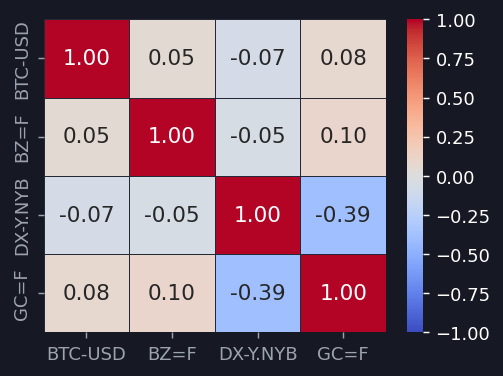

In [36]:
analyze_assets(df, [0.5, 0.2, 0.1, 0.2])